In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Opciones para evitar notación científica en NumPy y Pandas
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: f"{x:0.5f}")

# Opciones de gráficos
plt.style.use("ggplot")
%config InlineBackend.figure_format = "retina"

In [18]:
matriculados = pd.read_csv('data/OFICIAL_WEB_PROCESO_MAT_2007_AL_2022_24_06_2022_E.csv', encoding="latin1", sep=";")

C:\Users\aigna\AppData\Local\Temp\ipykernel_17016\2510260436.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  matriculados = pd.read_csv('data/OFICIAL_WEB_PROCESO_MAT_2007_AL_2022_24_06_2022_E.csv', encoding="latin1", sep=";")


In [19]:
lista1 = ['MATRICULADOS MUJERES POR PROGRAMA',
       'MATRICULADOS HOMBRES POR PROGRAMA', 'TOTAL MATRICULADOS PRIMER AÑO',
       'MATRICULADOS MUJERES PRIMER AÑO', 'MATRICULADOS HOMBRES PRIMER AÑO',
       'RANGO DE EDAD 15 A 19 AÑOS',
       'RANGO DE EDAD 20 A 24 AÑOS', 'RANGO DE EDAD 25 A 29 AÑOS',
       'RANGO DE EDAD 30 A 34 AÑOS', 'RANGO DE EDAD 35 A 39 AÑOS',
       'RANGO DE EDAD 40 Y MÁS AÑOS', 'RANGO DE EDAD SIN INFORMACIÓN',
       ' PROMEDIO EDAD MUJER ',
       ' PROMEDIO EDAD HOMBRE ',
       'TES MUNICIPAL',
       'TES PARTICULAR SUBVENCIONADO', 'TES PARTICULAR PAGADO',
       'TES CORP. DE ADMINISTRACIÓN DELEGADA', 'TES SERVICIO LOCAL EDUCACION',
       'TOTAL TES','TIPO ESTABLECIMIENTO HC',
       'TIPO ESTABLECIMIENTO TP', 'CLAS_EST ADULTO', 'CLAS_EST JOVEN']

In [20]:
matriculados[lista1] = matriculados[lista1].fillna(0)

In [21]:
columnas_eliminar = matriculados[(matriculados['DURACIÓN ESTUDIO CARRERA'].isna()) & (matriculados['DURACIÓN TOTAL DE CARRERA'].isna())]

In [22]:
matriculados = matriculados.drop(columnas_eliminar.index)

In [23]:
columnas_eliminar2 = matriculados[matriculados[' PROMEDIO EDAD CARRERA '].isna()]

In [24]:
matriculados = matriculados.drop(columnas_eliminar2.index)

In [25]:
matriculados['MODALIDAD'] = matriculados['MODALIDAD'].fillna("Presencial")

In [26]:
matriculados['CÓDIGO DE INSTITUCIÓN'] = matriculados['CÓDIGO DE INSTITUCIÓN'].astype(str)

In [27]:
round(matriculados.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
TOTAL MATRICULADOS,216008.00000,83.99000,138.75000,1.00000,13.00000,39.00000,99.00000,4873.00000
MATRICULADOS MUJERES POR PROGRAMA,216008.00000,43.89000,81.32000,0.00000,4.00000,15.00000,48.00000,2336.00000
MATRICULADOS HOMBRES POR PROGRAMA,216008.00000,40.10000,79.11000,0.00000,4.00000,15.00000,45.00000,3507.00000
TOTAL MATRICULADOS PRIMER AÑO,216008.00000,25.19000,38.19000,0.00000,0.00000,14.00000,36.00000,1283.00000
MATRICULADOS MUJERES PRIMER AÑO,216008.00000,13.08000,23.60000,0.00000,0.00000,4.00000,17.00000,748.00000
MATRICULADOS HOMBRES PRIMER AÑO,216008.00000,12.11000,22.09000,0.00000,0.00000,4.00000,16.00000,661.00000
DURACIÓN ESTUDIO CARRERA,216008.00000,6.29000,2.68000,1.00000,4.00000,5.00000,8.00000,33.00000
DURACIÓN TOTAL DE CARRERA,216008.00000,6.55000,2.75000,1.00000,5.00000,6.00000,9.00000,36.00000
TOTAL RANGO DE EDAD,216008.00000,83.99000,138.75000,1.00000,13.00000,39.00000,99.00000,4873.00000
RANGO DE EDAD 15 A 19 AÑOS,216008.00000,14.96000,35.16000,0.00000,0.00000,1.00000,15.00000,1335.00000


In [28]:
matriculados['AÑO'] = matriculados['AÑO'].str.replace('MAT_','')

# Análisis N°1:

Se analiza el comportamiento histórico del nivel de mátricula en el Sistema de Educación Superior en relación al sexo.

In [29]:
matriculas_historico = matriculados[['AÑO','TOTAL MATRICULADOS','MATRICULADOS MUJERES POR PROGRAMA','MATRICULADOS HOMBRES POR PROGRAMA']].groupby('AÑO').sum().reset_index().melt(id_vars='AÑO', var_name='ITEM', value_name='TOTAL')

Text(0.5, -0.25, 'Elaborado por: @Ignvci')

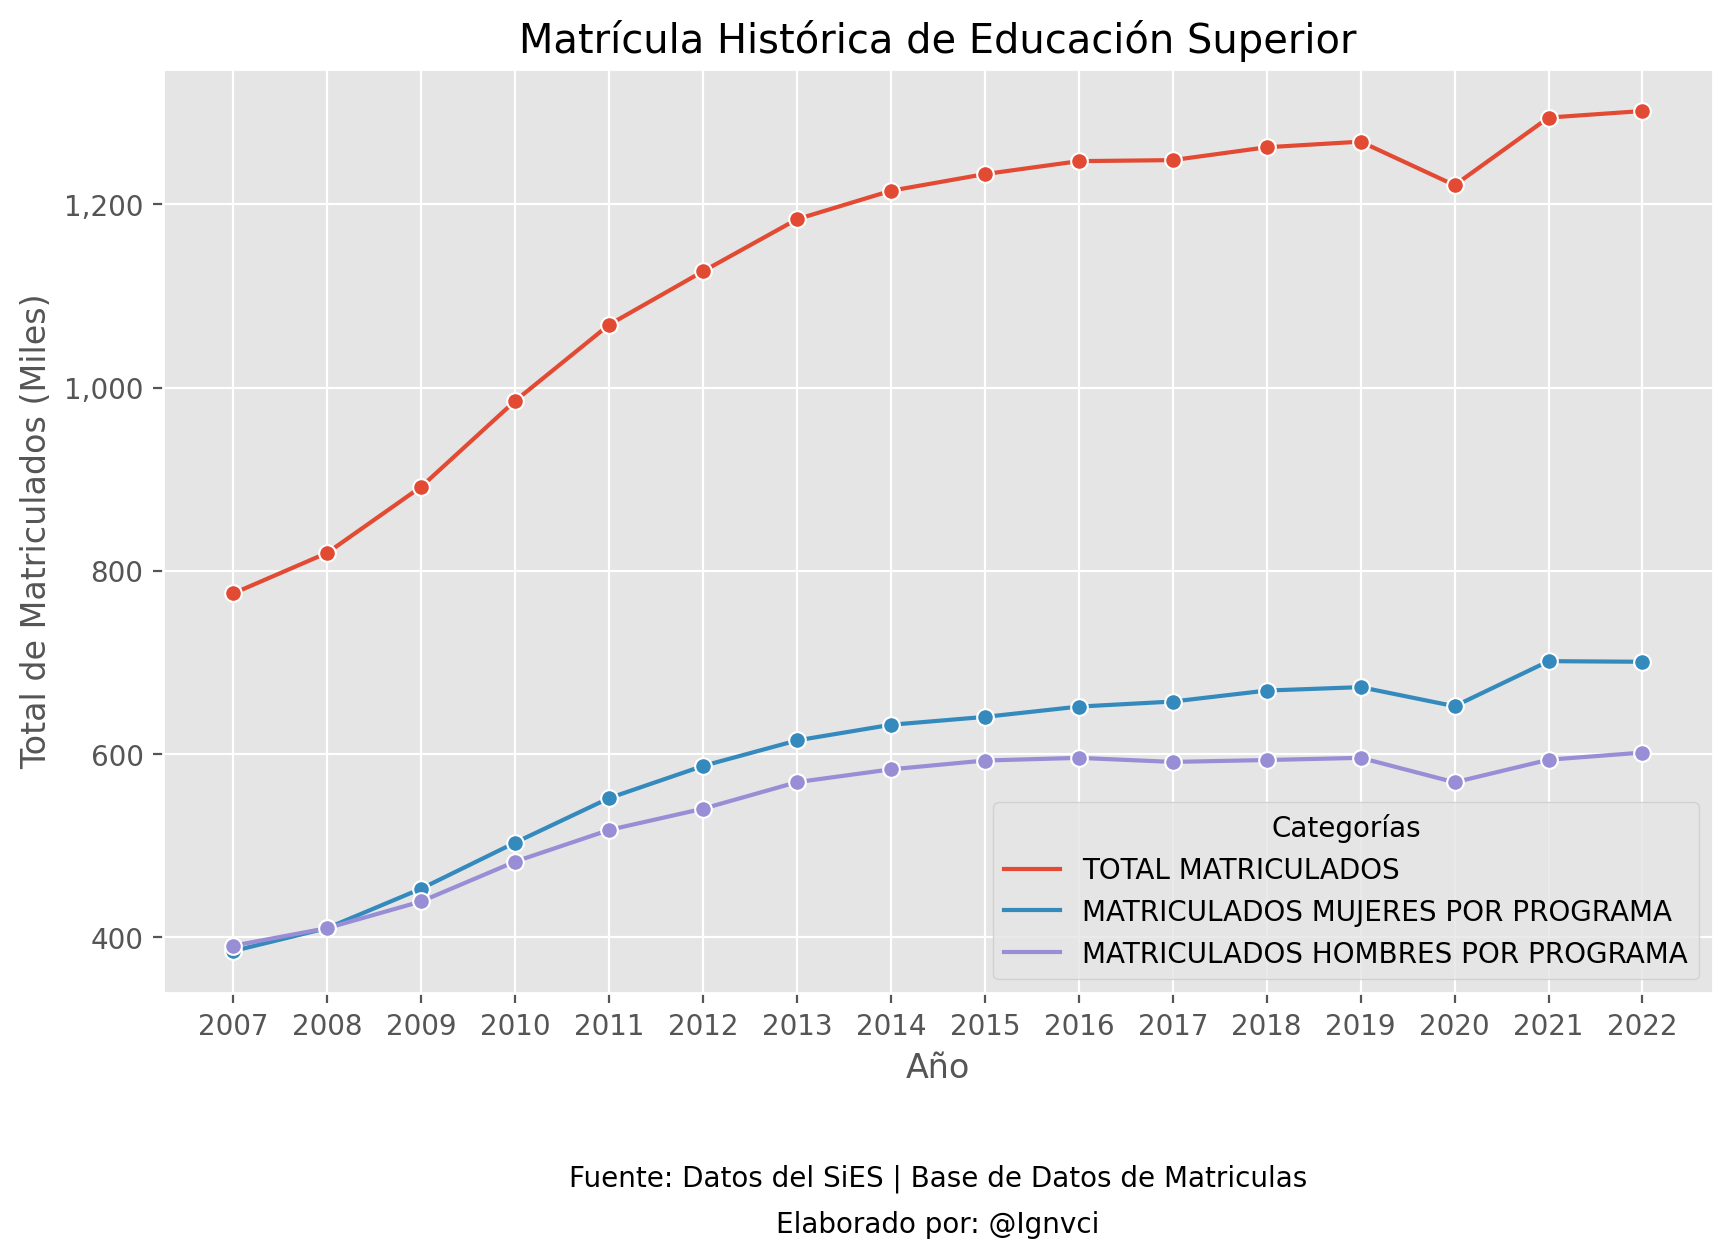

In [46]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(
    data= matriculas_historico,
    x="AÑO",
    y= "TOTAL",
    hue = "ITEM",
    marker ="o"
)

# Etiquetas

ax.set_title("Matrícula Histórica de Educación Superior")
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Total de Matriculados (Miles)")
ax.set_xlabel("Año")
ax.legend(title="Categorías")
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000))
ax.yaxis.set_major_formatter(formatter)

# Fuentes
ax.text(0.5, -0.2, "Fuente: Datos del SiES | Base de Datos de Matriculas",
        ha='center', va='center', transform=ax.transAxes)
ax.text(0.5, -0.25, "Elaborado por: @Ignvci",
        ha='center', va='center', transform=ax.transAxes)


## Conclusión:

Se puede observar que salvo en los periodos 2007 y 2008, la Matricula de mujeres supera a la de los hombres.

## Análisis N°2:

Se analiza el nivel de matricula en relación con la acreditación de la carrera.

In [52]:
matriculados_acreditación = matriculados[['AÑO','ACREDITACIÓN CARRERA','TOTAL MATRICULADOS']].groupby(['AÑO','ACREDITACIÓN CARRERA']).sum().reset_index()

In [55]:
display(matriculados_acreditación.head())

,AÑO,ACREDITACIÓN CARRERA,TOTAL MATRICULADOS
0,2007,ACREDITADA,170935
1,2007,NO ACREDITADA,589926
2,2007,SIN INFORMACION,14369
3,2008,ACREDITADA,170341
4,2008,NO ACREDITADA,634367


Text(0.5, -0.25, 'Elaborado por: @Ignvci')

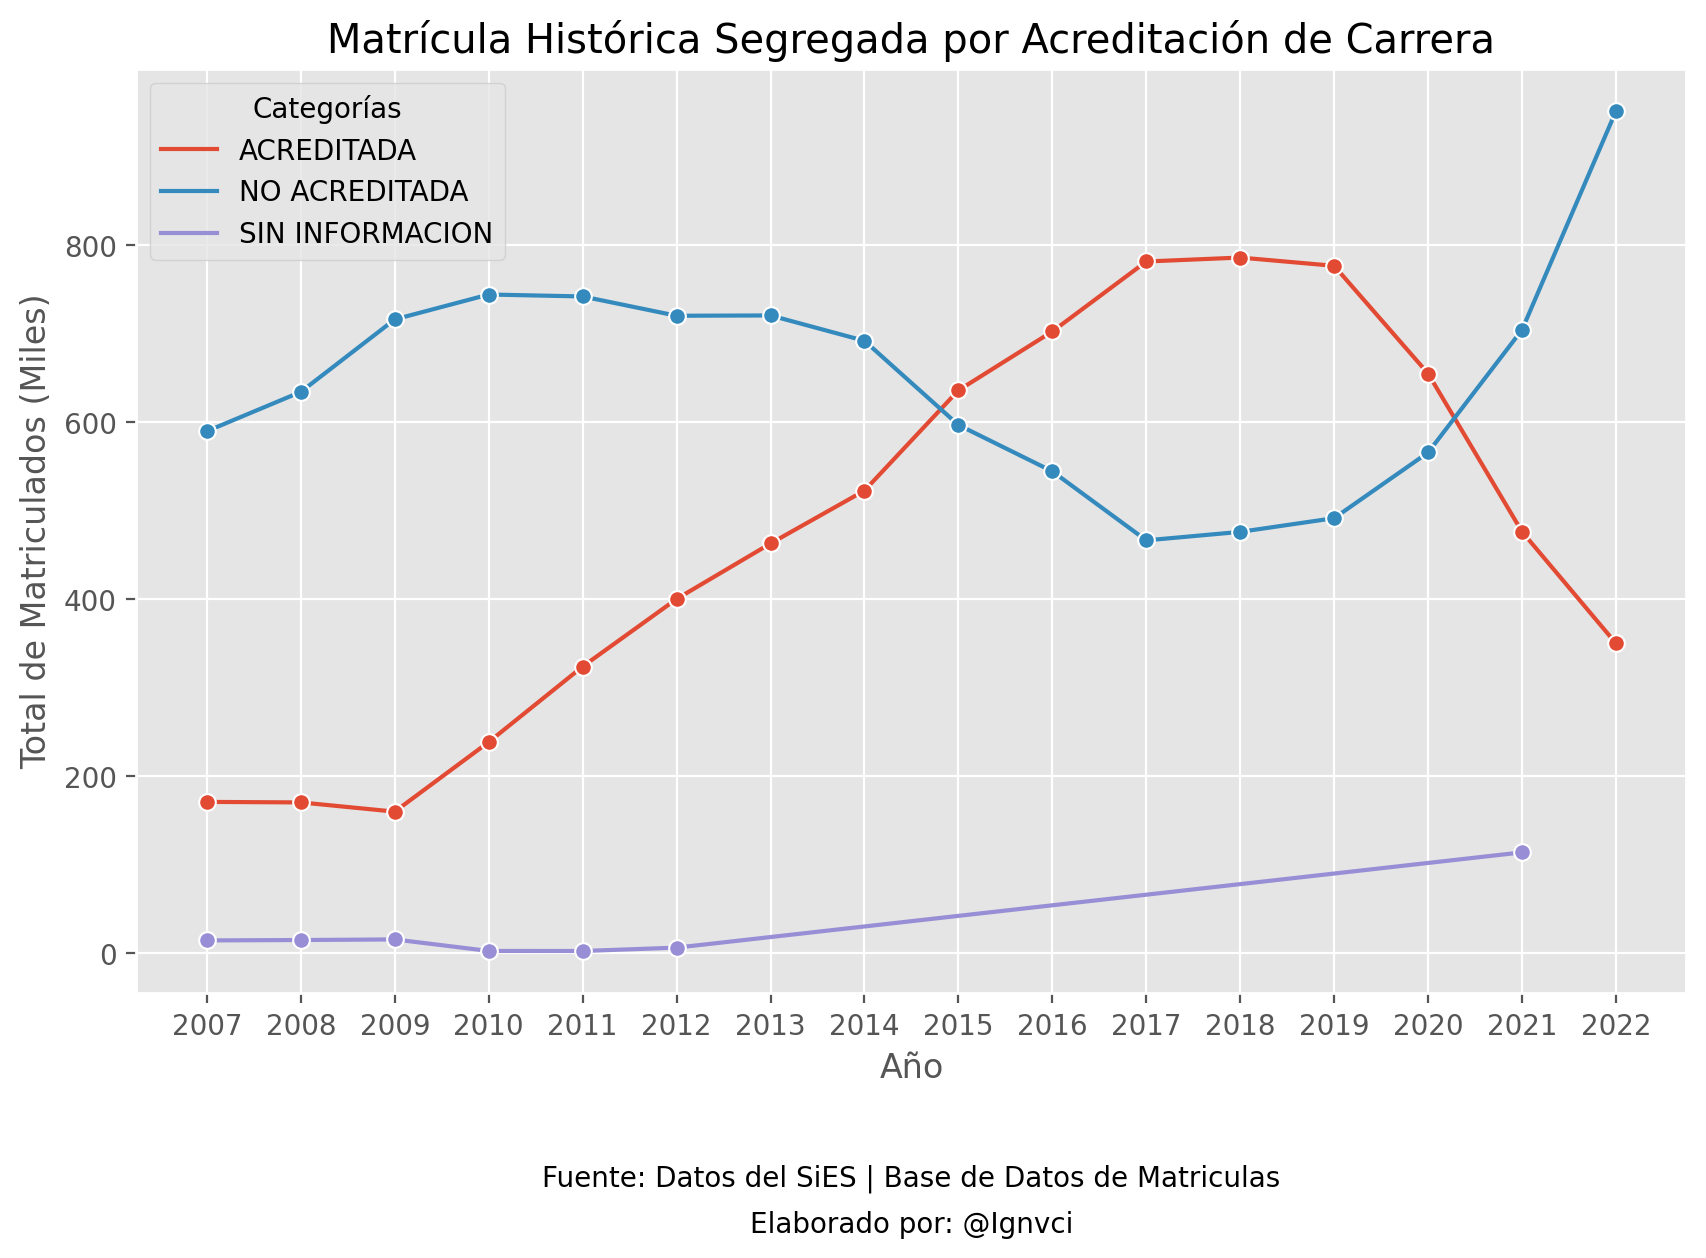

In [59]:
fig, ax = plt.subplots(figsize= (10, 6))
sns.lineplot(
    data = matriculados_acreditación,
    x = "AÑO",
    y= "TOTAL MATRICULADOS",
    hue="ACREDITACIÓN CARRERA",
    marker="o"
)

# Etiquetas

ax.set_title("Matrícula Histórica Segregada por Acreditación de Carrera")
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Total de Matriculados (Miles)")
ax.set_xlabel("Año")
ax.legend(title="Categorías")
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000))
ax.yaxis.set_major_formatter(formatter)

# Fuentes
ax.text(0.5, -0.2, "Fuente: Datos del SiES | Base de Datos de Matriculas",
        ha='center', va='center', transform=ax.transAxes)
ax.text(0.5, -0.25, "Elaborado por: @Ignvci",
        ha='center', va='center', transform=ax.transAxes)


## Conclusión N°2:

Se puede observar que respecto a la Acreditación de la Carrera, preliminarmente no es importante que este acreditada, ya que los niveles de matricula son más alto en aquellas carreras que `No están Acreditadas`.

## Análisis 3:

Se analiza el nivel de Matrícula en función de la Acreditación Institucional.


In [66]:
matriculados_acreditacion2 = matriculados[['ACREDITACIÓN INSTITUCIONAL','TOTAL MATRICULADOS','AÑO']].groupby(['AÑO','ACREDITACIÓN INSTITUCIONAL']).sum().reset_index()

In [67]:
display(matriculados_acreditacion2.head())

,AÑO,ACREDITACIÓN INSTITUCIONAL,TOTAL MATRICULADOS
0,2007,ACREDITADA,633596
1,2007,NO ACREDITADA,141634
2,2008,ACREDITADA,696015
3,2008,NO ACREDITADA,123509
4,2009,ACREDITADA,759599


Text(0.5, -0.25, 'Elaborado por: @Ignvci')

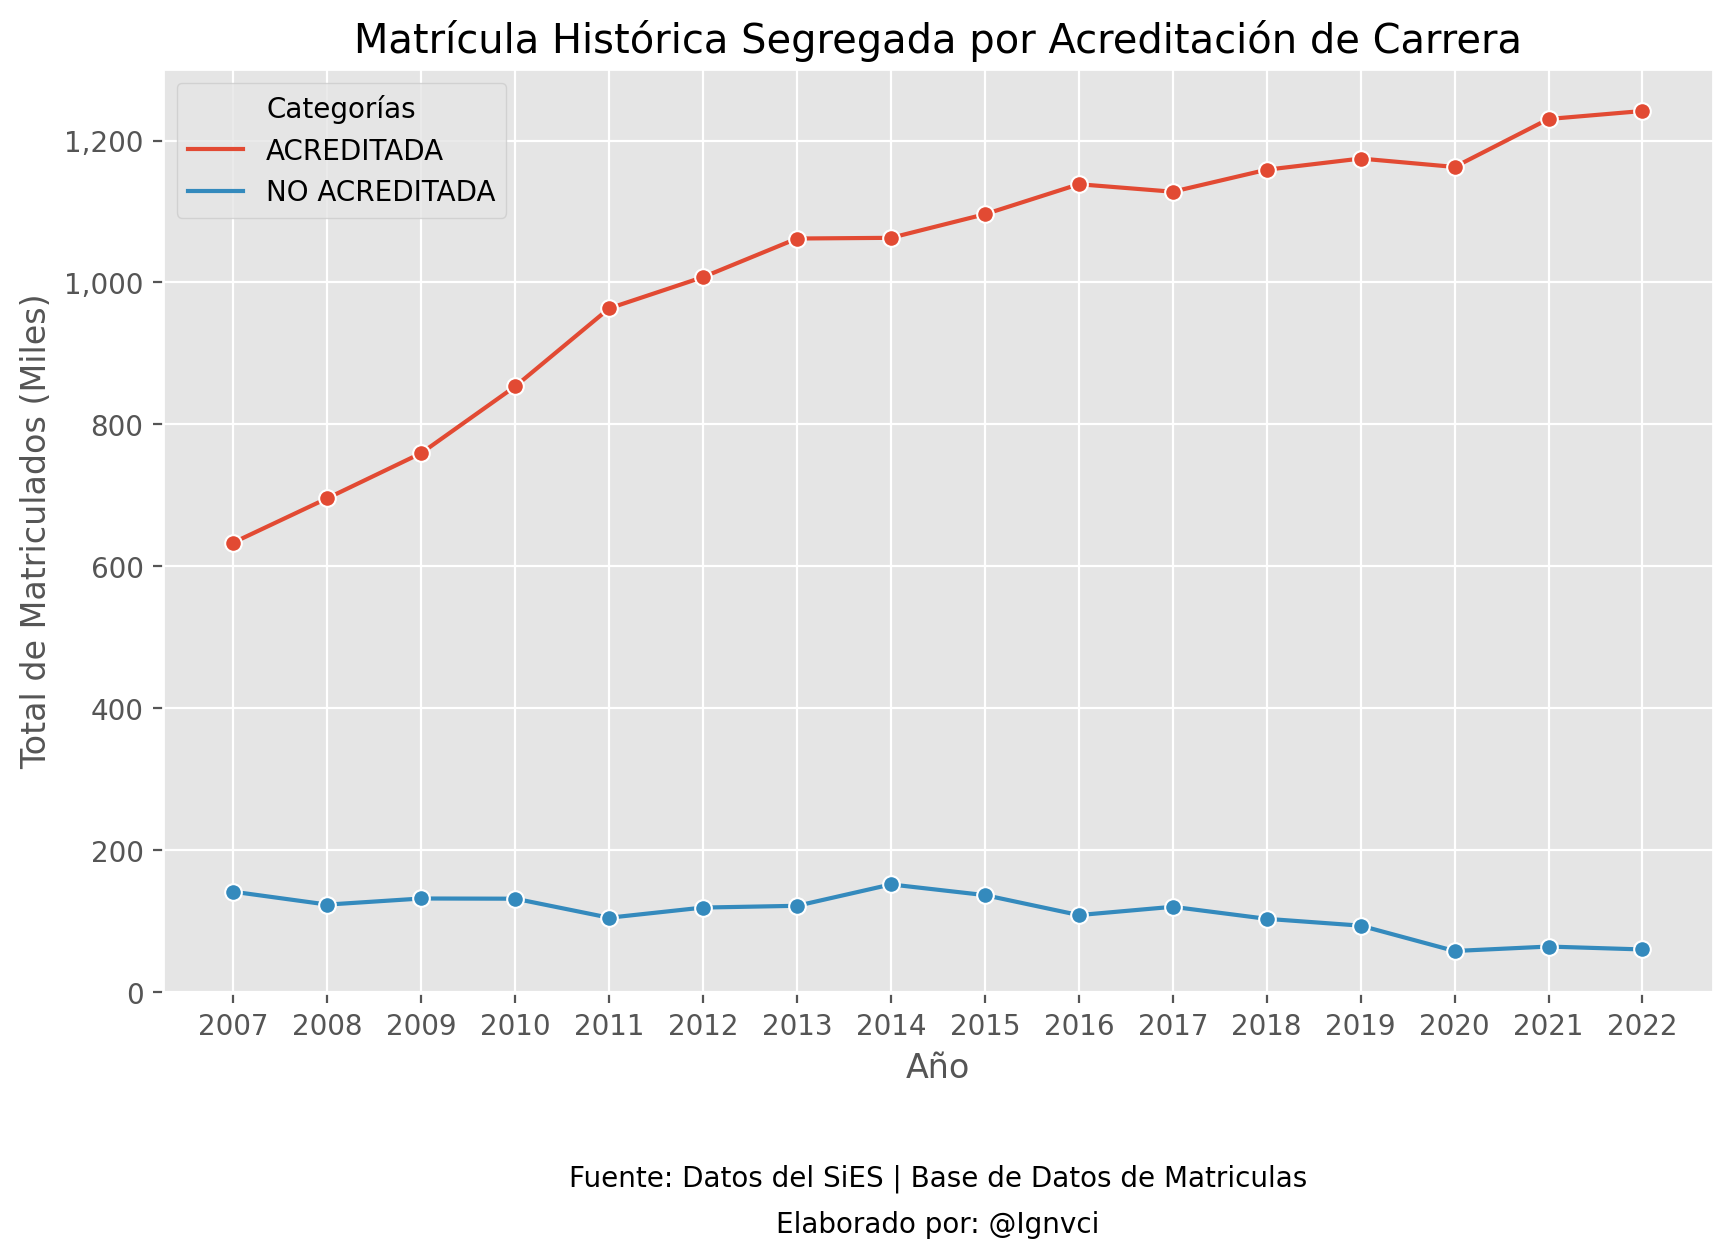

In [68]:
fig, ax = plt.subplots(figsize= (10, 6))
sns.lineplot(
    data = matriculados_acreditacion2,
    x = "AÑO",
    y= "TOTAL MATRICULADOS",
    hue="ACREDITACIÓN INSTITUCIONAL",
    marker="o"
)

# Etiquetas

ax.set_title("Matrícula Histórica Segregada por Acreditación Institucional")
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel("Total de Matriculados (Miles)")
ax.set_xlabel("Año")
ax.legend(title="Categorías")
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000))
ax.yaxis.set_major_formatter(formatter)

# Fuentes
ax.text(0.5, -0.2, "Fuente: Datos del SiES | Base de Datos de Matriculas",
        ha='center', va='center', transform=ax.transAxes)
ax.text(0.5, -0.25, "Elaborado por: @Ignvci",
        ha='center', va='center', transform=ax.transAxes)


## Conclusión N°3:

Caso contrario al Análisis N°2, se observa que en este caso de manera preliminar, si es importante que la institucion se encuentre acreditada.